In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import datasets

In [2]:
house = datasets.fetch_california_housing()
X = house.data
y = house.target
columns = house.feature_names
out = house.target_names
data = pd.DataFrame()
data[columns] = house.data
data['y'] = house.target
print(data.shape)

(20640, 9)


In [5]:
corr = data.iloc[:,:-1].corr().round(2).abs()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.00,0.12,0.33,0.06,0.00,0.02,0.08,0.02
HouseAge,0.12,1.00,0.15,0.08,0.30,0.01,0.01,0.11
AveRooms,0.33,0.15,1.00,0.85,0.07,0.00,0.11,0.03
AveBedrms,0.06,0.08,0.85,1.00,0.07,0.01,0.07,0.01
Population,0.00,0.30,0.07,0.07,1.00,0.07,0.11,0.10
AveOccup,0.02,0.01,0.00,0.01,0.07,1.00,0.00,0.00
Latitude,0.08,0.01,0.11,0.07,0.11,0.00,1.00,0.92
Longitude,0.02,0.11,0.03,0.01,0.10,0.00,0.92,1.00


In [10]:
corr_eq = corr*(corr<0.9)*1

<Axes: >

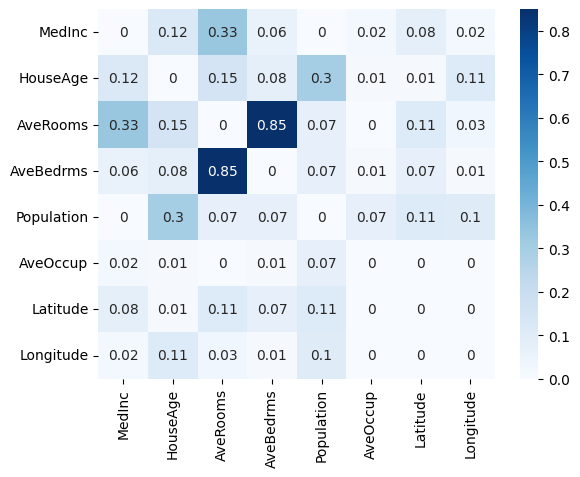

In [12]:
sns.heatmap(corr_eq,annot = True, cmap = "Blues")

In [13]:
for i in data.columns:
    print(f"Unique values in {i}: {len(data[i].unique())}")

Unique values in MedInc: 12928
Unique values in HouseAge: 52
Unique values in AveRooms: 19392
Unique values in AveBedrms: 14233
Unique values in Population: 3888
Unique values in AveOccup: 18841
Unique values in Latitude: 862
Unique values in Longitude: 844
Unique values in y: 3842


In [14]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [22]:
data_eq = data.iloc[:,:6]
data_eq["y"] = data.y
data_eq.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422


In [17]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [21]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [23]:
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=104,
                                   test_size=0.25,
                                   shuffle=True)

In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
model = LinearRegression()
model.fit(X_train,y_train)
print(model.score(X_test,y_test))

0.6039727804199116


In [26]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train)
results = model.fit()
results

ModuleNotFoundError: No module named 'statsmodels'